# **Horse_or_Human_Prediction_Model**

## **1-Import Libraries**

In [19]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.regularizers import l2

## **2-Load Helper Function**

In [2]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2022-03-25 19:39:02--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-03-25 19:39:02 (55.6 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [3]:
from helper_functions import compare_historys, plot_loss_curves, create_tensorboard_callback, plot_loss_curves, pred_and_plot

## **3-Import Dataset**

In [4]:
import zipfile

# unzip the downloaded file
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Horse_or_Human_prediction_dataset.zip")
zip_ref.extractall()
zip_ref.close()

## **4-Load Datasets**

In [8]:
train_dir = '/content/horse-or-human/horse-or-human/train'
val_dir = '/content/horse-or-human/horse-or-human/validation'

## **5-Preprocessing The Data**

In [9]:
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

In [10]:
training_data =  training_datagen.flow_from_directory(train_dir, 
                                      target_size=(150, 150), 
                                      batch_size=32,
                                      class_mode='binary')

Found 1027 images belonging to 2 classes.


In [11]:
training_data.class_indices

{'horses': 0, 'humans': 1}

In [12]:
valid_datagen = ImageDataGenerator(rescale=1./255)

In [13]:
valid_data =  valid_datagen.flow_from_directory(val_dir, 
                                      target_size=(150, 150), 
                                      batch_size=32,
                                      class_mode='binary')

Found 256 images belonging to 2 classes.


## **6-Plot The Images**

In [14]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

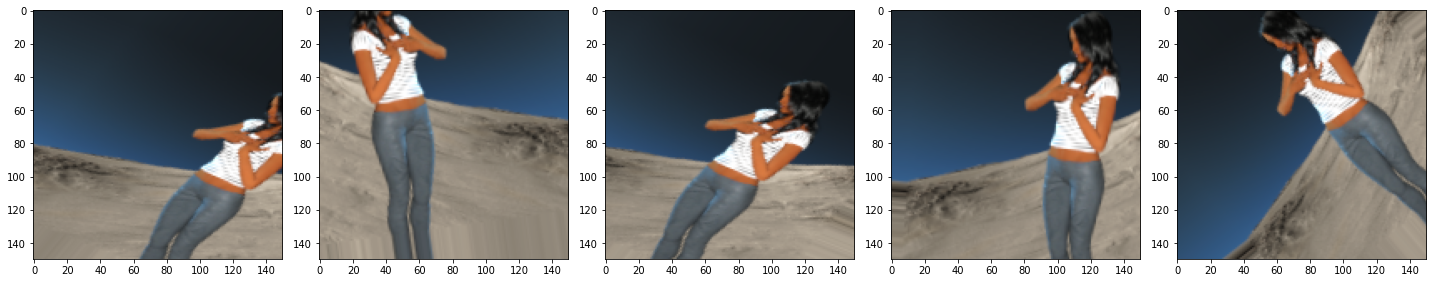

In [15]:
images = [training_data[0][0][0] for i in range(5)]
plotImages(images)

## **7-Build The Custom CNN Model**

In [20]:
#Building cnn model
cnn_model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=7, input_shape=[150, 150, 3],kernel_regularizer=l2(l=0.01)),
                                    tf.keras.layers.BatchNormalization( axis=-1,momentum=0.99,epsilon=0.001),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                     
                                    keras.layers.Conv2D(filters=64, kernel_size=5),
                                    tf.keras.layers.BatchNormalization( axis=-1,momentum=0.99,epsilon=0.001),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                     
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    tf.keras.layers.BatchNormalization( axis=-1,momentum=0.99,epsilon=0.001),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                                                         
                                    keras.layers.Conv2D(filters=256, kernel_size=3),
                                    tf.keras.layers.BatchNormalization( axis=-1,momentum=0.99,epsilon=0.001),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                                                     
                                    keras.layers.Flatten(), # neural network beulding
                                    keras.layers.Dense(units=128, activation='relu'), # input layers
                                    tf.keras.layers.BatchNormalization( axis=-1,momentum=0.99,epsilon=0.001),
                                    keras.layers.Dropout(0.5),                                      
                                    keras.layers.Dense(units=256, activation='relu'),  
                                    tf.keras.layers.BatchNormalization( axis=-1,momentum=0.99,epsilon=0.001),                                 
                                    keras.layers.Dropout(0.5),                                    
                                    keras.layers.Dense(units=2, activation='softmax') # output layer
])

## **8-Compile The Model**

In [22]:
# compile cnn model
cnn_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## **9-Create Model Checkpoint**

In [23]:
model_path = '/content/drive/MyDrive/horse_or_human_prediction.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

## **10-Train and Evaluate The Model**

In [24]:
# train cnn model
history = cnn_model.fit(training_data, 
                          epochs=100, 
                          verbose=1, 
                          validation_data= valid_data,
                          callbacks=callbacks_list)

Epoch 1/100
33/33 [==============================] - ETA: 0s - loss: 1.0876 - accuracy: 0.6018
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to /content/drive/MyDrive/horse_or_human_prediction.h5
33/33 [==============================] - 25s 396ms/step - loss: 1.0876 - accuracy: 0.6018 - val_loss: 1.0542 - val_accuracy: 0.5000
Epoch 2/100
33/33 [==============================] - ETA: 0s - loss: 0.8076 - accuracy: 0.7128
Epoch 2: val_accuracy did not improve from 0.50000
33/33 [==============================] - 17s 529ms/step - loss: 0.8076 - accuracy: 0.7128 - val_loss: 1.2109 - val_accuracy: 0.5000
Epoch 3/100
32/33 [============================>.] - ETA: 0s - loss: 0.7041 - accuracy: 0.7471
Epoch 3: val_accuracy did not improve from 0.50000
33/33 [==============================] - 15s 446ms/step - loss: 0.7030 - accuracy: 0.7468 - val_loss: 1.1043 - val_accuracy: 0.5000
Epoch 4/100
33/33 [==============================] - ETA: 0s - loss: 0.6933 - accuracy: 0.7371
E

In [26]:
cnn_model.evaluate(valid_data)

8/8 [==============================] - 1s 118ms/step - loss: 4.8813 - accuracy: 0.5156


[4.881291389465332, 0.515625]

## **11-Plot The Graph**

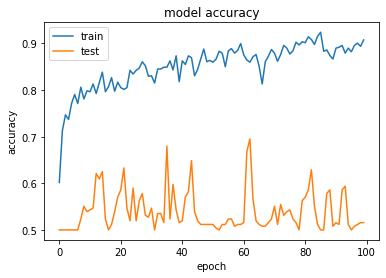

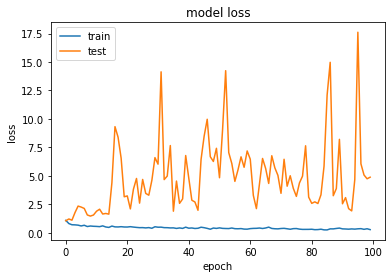

In [27]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## **12-Saving The Model**

In [35]:
cnn_model.save('Horse_or_Human_Prediction_Using_CNN.h5')